# Experiments with PDFA Specification Synthesis

Nicholas Renninger

## Preparing the Experiment

Loading in the PDFA specification model:

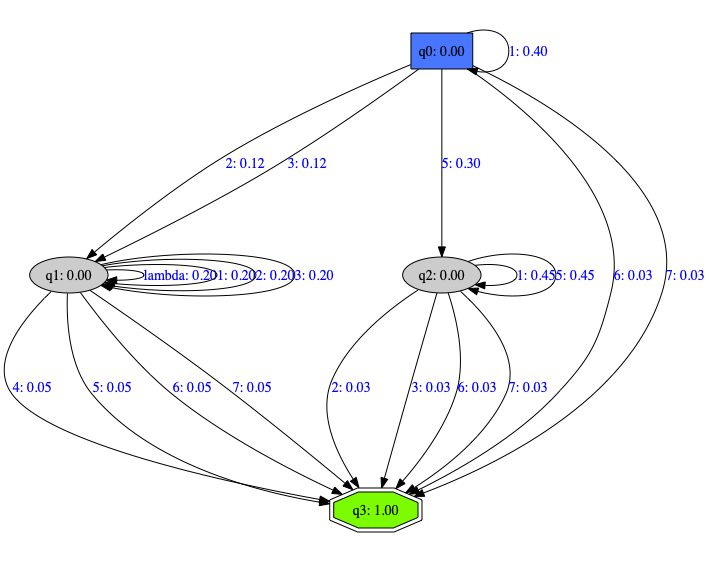

Trace: [7]
Probability of trace in language of the model: 0.025
Approximate Cross-Entropy of Trace: 5.321928094887363


In [1]:
%load_ext autoreload
%autoreload 2

from wombats.automaton import active_automata

pdfa_config_file = 'wombats/config/PDFA_meeting_example.yaml'
pdfa_specification = active_automata.get(automaton_type='PDFA',
                                         graph_data=pdfa_config_file)
pdfa_specification.draw('pdfa')
(trace, trace_len,
 trace_prob) = pdfa_specification.generate_trace(pdfa_specification.start_state, N=20)
trace_crossent = pdfa_specification.cross_entropy_approx(trace)

print('Trace:', trace)
print('Probability of trace in language of the model:', trace_prob)
print(f'Approximate Cross-Entropy of Trace: {trace_crossent}')

In [2]:
pdfa_specification.most_probable_string(min_string_probability=0.0001,
                                        max_string_length=100)

(['lambda', 7], 0.025)

Loading in the Transition System (TS) model:

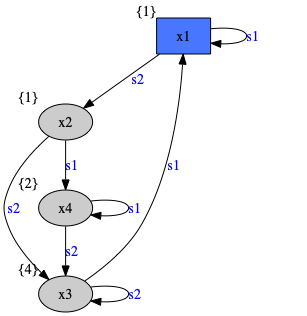

In [3]:
%autoreload 2
TS_config_file = 'wombats/config/TS_meeting_example.yaml'
transition_system = active_automata.get(automaton_type='TS',
                                        graph_data=TS_config_file)

transition_system.draw('TS')

In [4]:
word = ['s2', 's1', 's2']
print(transition_system.run(word))

([1, 1, 2, 4], ['x1', 'x2', 'x4', 'x3'])


In [5]:
print(transition_system.generate_trace(transition_system.start_state, N=10))

(['s2', 's1', 's1', 's1', 's2', 's2', 's1', 's1', 's1', 's2', 's1'], 11, 0.00048828125)


## PDFA ⊗ TS Product


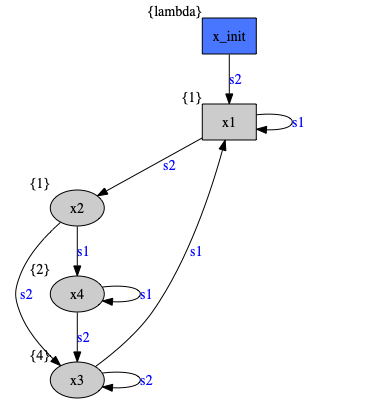

In [6]:
%autoreload 2
product = active_automata.get(automaton_type='Product',
                              graph_data=(transition_system,
                                          pdfa_specification),
                             show_steps=True)

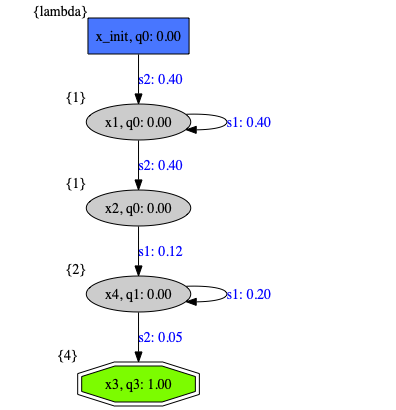

In [7]:
product.draw('product')

## Probabilistic Synthesis on the Product

Here, we are going to compute the most probable string on the product automaton.

In [8]:
controls, prob_of_controls_under_spec = product.compute_strategy()

print(f'Optimal Controls: {controls}')
print(f'Probability of Generated TS Observations in Spec: ' +
      f'{prob_of_controls_under_spec}')

Optimal Controls: ['s2', 's1', 's2']
Probability of Generated TS Observations in Spec: 0.0010000000000000002


### Applying Controller to Original System

In [9]:
output_string, visited_states = transition_system.run(controls)

print(f'Output word of run: {output_string}')
print(f'Output state sequence of run: {visited_states}')

Output word of run: [1, 1, 2, 4]
Output state sequence of run: ['x1', 'x2', 'x4', 'x3']


### Verifying Language Equivalence of Product MPS and PDFA

We now want to feed the output word of the MPS controller applied to the TS into our specification and verify we get the same probability of generation:

In [10]:
prob_of_run_proj_on_PDFA = pdfa_specification.score(output_string)

print('Probability of product MPS run on TS when projected on PDFA: ',
      prob_of_run_proj_on_PDFA)

Probability of product MPS run on TS when projected on PDFA:  0.0010000000000000002
